In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from ast import literal_eval

from scipy.stats import bootstrap
import numpy as np

In [2]:
selected_topics_df = pd.read_csv(
    '../out_files/selected_topics_shift_per_period_compass_50iterations.csv',
    converters={'period_pair': literal_eval})
selected_topics_df

,iteration,period_pair,word,semantic_similarity,common_voc_size,neighbors_t1,neighbors_t2
0,0,"(12, 13)",συλλογικη,0.858836,80563,"[('κλαδικη', 0.7225825786590576), ('ατομικη', ...","[('κλαδικη', 0.6316236257553101), ('ατομικη', ..."
1,0,"(11, 12)",φορολογικα,0.882089,80924,"[('προσθετα', 0.6532301902770996), ('τελωνειακ...","[('προσθετα', 0.6811063289642334), ('βαρη', 0...."
2,0,"(10, 11)",εθνικη,0.956287,86396,"[('παλλαικη', 0.4205504059791565), ('ελληνικη'...","[('πολυμελης', 0.5375679135322571), ('παλλαικη..."
3,0,"(8, 9)",αμυνα,0.882250,63542,"[('ασφαλεια', 0.6846429109573364), ('ακεραιοτη...","[('ακεραιοτητα', 0.6850458979606628), ('ασφαλε..."
4,0,"(11, 12)",συλλογικη,0.882529,80924,"[('ατομικη', 0.5900278091430664), ('κλαδικη', ...","[('κλαδικη', 0.6964172124862671), ('αποικιοκρα..."
...,...,...,...,...,...,...,...
48245,49,"(13, 15)",ανωτατη,0.873688,83188,"[('τριτοβαθμια', 0.7540215253829956), ('διαπολ...","[('τριτοβαθμια', 0.7569918632507324), ('μειονο..."
48246,49,"(12, 13)",αμυνα,0.873383,80563,"[('ομοψυχια', 0.5617215633392334), ('πινακοθηκ...","[('ομοψυχια', 0.5596197843551636), ('ακεραιοτη..."
48247,49,"(7, 8)",τουριστικης,0.873335,68800,"[('βιομηχανικης', 0.6592989563941956), ('οικισ...","[('ολοκληρωμενης', 0.7599883675575256), ('οικι..."
48248,49,"(7, 8)",επιδοματων,0.877304,68800,"[('επιδοματος', 0.8182019591331482), ('βοηθημα...","[('επιδοματος', 0.766563892364502), ('αποδοχων..."


In [3]:
def confidence_intervals(data):
    res = bootstrap((data,), np.mean, confidence_level=0.95)
    return (res.confidence_interval.low, res.confidence_interval.high)

In [4]:
selected_topics_df = selected_topics_df[['period_pair', 'word', 'semantic_similarity']].\
    groupby(['period_pair', 'word']).agg(['mean', confidence_intervals]).reset_index()
selected_topics_df.sort_values(by='period_pair', inplace=True)
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                               
                         confidence_intervals  
0    (0.8727779983598557, 0.8760447754101622)  
75   (0.8211049923951858, 0.8271862003507547)  
74    (0.8196545006360614, 0.825220652390252)  
73   (0.8863556713194266, 0.8892960671988472)  
72    (0.819729442279451, 0.8252394457294131)  
..                                        ...  
884  (0.7623574985783134, 0.7685015181992971)  
883  (0.8625543374264525, 0.8661619067344477)  
882  (0.9011441536613723, 0.9042892400841638)  
908  (0.6414388544879163, 0.6609339321786271)  
964  (0.8466455242728795, 0.8506470740535155)  

[965 rows x 4 columns]

In [5]:
selected_topics_df[['ci_low', 'ci_high']] = pd.DataFrame(selected_topics_df[('semantic_similarity', 'confidence_intervals')].tolist(), 
                                                         index= selected_topics_df.index)
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                                 ci_low   ci_high  
                         confidence_intervals                      
0    (0.8727779983598557, 0.8760447754101622)  0.872778  0.876045  
75   (0.8211049923951858, 0.8271862003507547)  0.821105  0.827186  
74    (0.8196545006360614, 0.825220652390252)  0.819655  0.825221  
73   (0.8863556713194266, 0.8892960671988472)  0.886356  0.889296  
72    (0.819729442279451, 0.8252394457294131)  0.819729  0.825239  
..                                        ...       ...       ...  
884  (0.7623574985783134, 0.7685015181992971)  0.762357  0.768502  
883  (0.8625543374264525, 0.8661619067344477)  0.862554  0.866162  
882  (0.9011441536613723, 0.9042892400841638)  0.901144  0.904289  
908  (0.6414388544879163, 0.6609339321786271)  0.641439  0.660934  
964  (0.8466455242728795, 0.8506470740535155)  0.846646  0.850647  

[965 rows x 6 columns]

In [6]:
selected_topics_df['yerr_low'] = (selected_topics_df[('semantic_similarity', 'mean')] 
                                  - selected_topics_df['ci_low'])
selected_topics_df['yerr_high'] = (selected_topics_df['ci_high'] 
                                   - selected_topics_df[('semantic_similarity', 'mean')])
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                                 ci_low   ci_high  yerr_low  \
                         confidence_intervals                                 
0    (0.8727779983598557, 0.8760447754101622)  0.872778  0.876045  0.001547   
75   (0.8211049923951858, 0.8271862003507547)  0.821105  0.827186  0.003104   
74    (0.8196545006360614, 0.825220652390252)  0.819655  0.825221  0.002695   
73   (0.8863556713194266, 0.8892960671988472)  0.886356  0.889296  0.001454   
72    (0.819729442279451, 0.8252394457294131)  0.819729  0.825239  0.002646   
..                                        ...       ...       ...       ...   
884  (0.7623574985783134, 0.7685015181992971)  0.762357  0.768502  0.003144   
883  (0.8625543374264525, 0.8661619067344477)  0.862554  0.866162  0.001818   
882  (0.9011441536613723, 0.9042892400841638)  0.901144  0.904289  0.001595   
908  (0.6414388544879163, 0.6609339321786271)  0.641439  0.660934  0.010773   
964  (0.8466455242728795, 0.8506470740535155)  0.846646  0.850647  0.002084   

    yerr_high  
               
0    0.001720  
75   0.002978  
74   0.002871  
73   0.001487  
72   0.002864  
..        ...  
884  0.003000  
883  0.001790  
882  0.001550  
908  0.008722  
964  0.001918  

[965 rows x 8 columns]

In [7]:
periods = {
    7: (1989, 1993),
    8: (1993, 1996),
    9: (1996, 2000),
    10: (2000, 2004),
    11: (2004, 2007),
    12: (2007, 2009),
    13: (2009, 2012),
    14: (2012, 2012),
    15: (2012, 2014),
    16: (2015, 2015),
    17: (2015, 2019),
    18: (2019, 2020)
}

In [8]:
selected_topics_df['period_start'] = selected_topics_df['period_pair'].map(lambda x: periods[x[0]][0])
selected_topics_df['period_end'] = selected_topics_df['period_pair'].map(lambda x: periods[x[1]][1])
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                                 ci_low   ci_high  yerr_low  \
                         confidence_intervals                                 
0    (0.8727779983598557, 0.8760447754101622)  0.872778  0.876045  0.001547   
75   (0.8211049923951858, 0.8271862003507547)  0.821105  0.827186  0.003104   
74    (0.8196545006360614, 0.825220652390252)  0.819655  0.825221  0.002695   
73   (0.8863556713194266, 0.8892960671988472)  0.886356  0.889296  0.001454   
72    (0.819729442279451, 0.8252394457294131)  0.819729  0.825239  0.002646   
..                                        ...       ...       ...       ...   
884  (0.7623574985783134, 0.7685015181992971)  0.762357  0.768502  0.003144   
883  (0.8625543374264525, 0.8661619067344477)  0.862554  0.866162  0.001818   
882  (0.9011441536613723, 0.9042892400841638)  0.901144  0.904289  0.001595   
908  (0.6414388544879163, 0.6609339321786271)  0.641439  0.660934  0.010773   
964  (0.8466455242728795, 0.8506470740535155)  0.846646  0.850647  0.002084   

    yerr_high period_start period_end  
                                       
0    0.001720         1989       1996  
75   0.002978         1989       1996  
74   0.002871         1989       1996  
73   0.001487         1989       1996  
72   0.002864         1989       1996  
..        ...          ...        ...  
884  0.003000         2015       2020  
883  0.001790         2015       2020  
882  0.001550         2015       2020  
908  0.008722         2015       2020  
964  0.001918         2015       2020  

[965 rows x 10 columns]

In [9]:
selected_topics_df['period_middle'] = ((selected_topics_df['period_start'] 
                                        + selected_topics_df['period_end']) / 2)
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                                 ci_low   ci_high  yerr_low  \
                         confidence_intervals                                 
0    (0.8727779983598557, 0.8760447754101622)  0.872778  0.876045  0.001547   
75   (0.8211049923951858, 0.8271862003507547)  0.821105  0.827186  0.003104   
74    (0.8196545006360614, 0.825220652390252)  0.819655  0.825221  0.002695   
73   (0.8863556713194266, 0.8892960671988472)  0.886356  0.889296  0.001454   
72    (0.819729442279451, 0.8252394457294131)  0.819729  0.825239  0.002646   
..                                        ...       ...       ...       ...   
884  (0.7623574985783134, 0.7685015181992971)  0.762357  0.768502  0.003144   
883  (0.8625543374264525, 0.8661619067344477)  0.862554  0.866162  0.001818   
882  (0.9011441536613723, 0.9042892400841638)  0.901144  0.904289  0.001595   
908  (0.6414388544879163, 0.6609339321786271)  0.641439  0.660934  0.010773   
964  (0.8466455242728795, 0.8506470740535155)  0.846646  0.850647  0.002084   

    yerr_high period_start period_end period_middle  
                                                     
0    0.001720         1989       1996        1992.5  
75   0.002978         1989       1996        1992.5  
74   0.002871         1989       1996        1992.5  
73   0.001487         1989       1996        1992.5  
72   0.002864         1989       1996        1992.5  
..        ...          ...        ...           ...  
884  0.003000         2015       2020        2017.5  
883  0.001790         2015       2020        2017.5  
882  0.001550         2015       2020        2017.5  
908  0.008722         2015       2020        2017.5  
964  0.001918         2015       2020        2017.5  

[965 rows x 11 columns]

In [10]:
selected_topics_df[(selected_topics_df['word'] == 'ομοφυλα')]['semantic_similarity']['mean']

597    0.650990
708    0.663927
819    0.825442
930    0.805897
Name: mean, dtype: float64

In [11]:
word_period_df = selected_topics_df.groupby(['word', 'period_pair']).agg('first')
word_period_df

/home/dina/Documents/repos/paper_greekparliament/.parl_env/lib/python3.7/site-packages/pandas/core/generic.py:4147: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


semantic_similarity  \
                                 mean   
word  period_pair                       
brain (12, 13)               0.703587   
      (13, 15)               0.702042   
      (15, 17)               0.886206   
      (17, 18)               0.946961   
drain (12, 13)               0.729124   
...                               ...   
φπα   (11, 12)               0.840230   
      (12, 13)               0.814251   
      (13, 15)               0.912290   
      (15, 17)               0.855084   
      (17, 18)               0.848729   

                                                               ci_low  \
                                       confidence_intervals             
word  period_pair                                                       
brain (12, 13)     (0.6929538527366155, 0.7137360331084117)  0.692954   
      (13, 15)     (0.6951606010145162, 0.7087950345265948)  0.695161   
      (15, 17)     (0.8839195634974443, 0.8884235980921656)  0.883920   
      (17, 18)     (0.9460514078573045, 0.9478935619464781)  0.946051   
drain (12, 13)     (0.7183889212579968, 0.7390081470001016)  0.718389   
...                                                     ...       ...   
φπα   (11, 12)     (0.8377323786477318, 0.8423240404597911)  0.837732   
      (12, 13)       (0.81216071873374, 0.8164353054703214)  0.812161   
      (13, 15)     (0.9112018062169435, 0.9132505579000246)  0.911202   
      (15, 17)     (0.8533530193179011, 0.8567075685645134)  0.853353   
      (17, 18)     (0.8466455242728795, 0.8506470740535155)  0.846646   

                    ci_high  yerr_low yerr_high period_start period_end  \
                                                                          
word  period_pair                                                         
brain (12, 13)     0.713736  0.010633  0.010149         2007       2012   
      (13, 15)     0.708795  0.006881  0.006754         2009       2014   
      (15, 17)     0.888424  0.002287  0.002217         2012       2019   
      (17, 18)     0.947894  0.000910  0.000932         2015       2020   
drain (12, 13)     0.739008  0.010735  0.009884         2007       2012   
...                     ...       ...       ...          ...        ...   
φπα   (11, 12)     0.842324  0.002498  0.002094         2004       2009   
      (12, 13)     0.816435  0.002090  0.002184         2007       2012   
      (13, 15)     0.913251  0.001088  0.000961         2009       2014   
      (15, 17)     0.856708  0.001731  0.001623         2012       2019   
      (17, 18)     0.850647  0.002084  0.001918         2015       2020   

                  period_middle  
                                 
word  period_pair                
brain (12, 13)           2009.5  
      (13, 15)           2011.5  
      (15, 17)           2015.5  
      (17, 18)           2017.5  
drain (12, 13)           2009.5  
...                         ...  
φπα   (11, 12)           2006.5  
      (12, 13)           2009.5  
      (13, 15)           2011.5  
      (15, 17)           2015.5  
      (17, 18)           2017.5  

[965 rows x 9 columns]

In [12]:
word_period_df[('semantic_similarity')]

mean                      confidence_intervals
word  period_pair                                                    
brain (12, 13)     0.703587  (0.6929538527366155, 0.7137360331084117)
      (13, 15)     0.702042  (0.6951606010145162, 0.7087950345265948)
      (15, 17)     0.886206  (0.8839195634974443, 0.8884235980921656)
      (17, 18)     0.946961  (0.9460514078573045, 0.9478935619464781)
drain (12, 13)     0.729124  (0.7183889212579968, 0.7390081470001016)
...                     ...                                       ...
φπα   (11, 12)     0.840230  (0.8377323786477318, 0.8423240404597911)
      (12, 13)     0.814251    (0.81216071873374, 0.8164353054703214)
      (13, 15)     0.912290  (0.9112018062169435, 0.9132505579000246)
      (15, 17)     0.855084  (0.8533530193179011, 0.8567075685645134)
      (17, 18)     0.848729  (0.8466455242728795, 0.8506470740535155)

[965 rows x 2 columns]

In [13]:
topics_to_show = word_period_df[word_period_df[('semantic_similarity', 'mean')] <= 0.651].\
    reset_index()['word'].unique()

In [14]:
topics_to_skip = set([
    'ανδρα', 'αντρα', 'αντρας', #keep ανδρας
    'ασυλου',
    'θρησκευτικων', 'θρησκειας', 'θρησκευτικα', 'θρησκευτικο',# keep θρησκειa
    'κοκ',
    'οαεδ',
    'οσε',
    'υιοθεσιας', #keep υιοθεσια
    'προσχολικη',
    'κοκ',
    'οσε',
    'αθλητισμος',
    'αθλητισμου',
    'υδροδοτηση',
    'αλιεια',
    'εργασιακα',
    'εκκλησιας', 'εκκλησια',
    'γυναικας',
    'μεταναστευτικο'
])

topics_to_show = [ t for t in topics_to_show if t not in topics_to_skip]
topics_to_show.append('γυναικα')

topics_to_show

['ανδρας',
 'ασυλο',
 'ημιαπασχοληση',
 'θρησκεια',
 'μακεδονικο',
 'ομοφυλα',
 'ομοφυλοφιλοι',
 'προσφυγικο',
 'υιοθεσια',
 'γυναικα']

In [15]:
period_combos = {
    7: (5, 6, 7),
    8: (8,),
    9: (9,),
    10: (10,),
    11: (11,),
    12: (12,),
    13: (13,),
    14: (14, 15),
    15: (14, 15),
    16: (16, 17),
    17: (16, 17),
    18: (18,)
}

In [16]:
def period_ticklabel(period_pair):
    start, end = period_pair
    start_str = '-'.join([str(x) for x in period_combos[start]])
    end_str = '-'.join([str(x) for x in period_combos[end]])
    return f'{start_str} ({periods[start][0]}-{periods[start][1]}) &\n {end_str} ({periods[end][0]}-{periods[end][1]})'

period_ticklabel((7, 8))

'5-6-7 (1989-1993) &\n 8 (1993-1996)'

In [17]:
topics = [
    'αγροτικη', 'αγροτικα', 'αγροτες', 
    'αναπτυξη', 'επενδυσεις', 'επενδυσεων',
    'ασφαλιστικο', 'εργασια', 'εργασιακα', 
    'δικαιωματα', 'συμβαση', 'συλλογικη', 
    'μισθος', 'βασικος', 'ημιαπασχοληση', 
    'brain', 'drain', 'οαεδ',
    'δικαιοσυνη', 'διαφανεια', 'υιοθεσια', 
    'υιοθεσιας', 'εθνικη', 'αμυνα', 
    'ενοπλες', 'εξωτερικη', 'διεθνεις',
    'ναυτιλια','νησια','υδροδοτηση',
    'αλιεια', 'οικονομια', 'αφορολογητο', 
    'αποκεντρωση', 'φπα', 'επιχειρησεις', 
    'φορολογικα', 'φορολογια', 'παιδεια', 
    'ερευνα', 'προσχολικη', 'ασυλο', 
    'ασυλου', 'πανεπιστημιακο', 'δευτεροβαθμια', 
    'πρωτοβαθμια', 'ανωτατη', 'δημοσια', 
    'ιδιωτικη', 'σχολες', 'περιβαλλον', 
    'ενεργεια', 'συστημα', 'πολιτισμος', 
    'αθλητισμος', 'πολιτισμο', 'αθλητισμου', 
    'προστασια', 'αστυνομια', 'κοκ', 
    'αστυνομικη', 'αστυνομικοι', 'αστυνομικων',
    'προσφυγικο', 'μεταναστευτικο', 'προσφυγες', 
    'μεταναστες', 'τουρισμος', 'τουριστικης', 
    'τουρισμου', 'τουρισμο', 'υγεια', 
    'προνοια', 'επιδοματα', 'επιδομα', 
    'επιδοματων', 'υποδομες', 'μεταφορες', 
    'αναπλαση', 'μμμ', 'μειωση', 
    'αυξηση', 'συνταξη', 'μακεδονικο', 
    'μακεδονιας', 'μακεδονια', 'προσληψεις', 
    'απολυσεις', 'εκας', 'οσε', 
    'συγκοινωνιες', 'νομοσχεδιο', 'θρησκεια', 
    'θρησκειας', 'θρησκευτικο', 'θρησκευτικου',
    'θρησκευτικων', 'γυναικα', 'γυναικας', 
    'ανδρας',  'ανδρα', 'αντρας', 
    'αντρα', 'ομοφυλα', 'ομοφυλοφιλοι', 
    'ομοφιλοφιλων', 'εοπυυ', 'τουρκια', 
    'τουρκιας', 'εκκλησιας', 'εκκλησια', 
    'κριση', 'κρισης', 'αυθαιρεσια'
]

In [18]:
topics = {
    'αγροτικη': 'agricultural', 'αγροτικα': 'agricultural', 'αγροτες': 'farmers',
    'αναπτυξη': 'growth', 'επενδυσεις': 'investements', 'επενδυσεων': 'investements',
    'ασφαλιστικο': 'insurance', 'εργασια': 'labor', 'εργασιακα': 'labor', 
    'δικαιωματα': 'rights', 'συμβαση': 'contract', 'συλλογικη': 'collective',
    'μισθος': 'salary', 'βασικος': 'minimum', 'ημιαπασχοληση': 'part-time', 
    'brain': 'brain', 'drain': 'drain', 'οαεδ': 'OAED',
    'δικαιοσυνη': 'justice', 'διαφανεια': 'transparency', 'υιοθεσια': 'adoption', 
    'υιοθεσιας': 'adoption', 'εθνικη': 'national', 'αμυνα': 'defence', 
    'ενοπλες': 'armed', 'εξωτερικη': 'foreign', 'διεθνεις': 'international',
    'ναυτιλια': 'shipping', 'νησια': 'islands', 'υδροδοτηση': 'water_supply', 
    'αλιεια': 'fishing', 'οικονομια': 'economy', 'αφορολογητο': 'tax-exempt',
    'αποκεντρωση': 'decentralization', 'φπα': 'VAT', 'επιχειρησεις': 'businesses', 
    'φορολογικα': 'tax', 'φορολογια': 'taxation', 'παιδεια': 'education', 
    'ερευνα': 'research', 'προσχολικη': 'preschool', 'ασυλο': 'asylum', 
    'ασυλου': 'asylum', 'πανεπιστημιακο': 'university', 'δευτεροβαθμια': 'secondary',
    'πρωτοβαθμια': 'primary', 'ανωτατη': 'higher', 'δημοσια': 'public', 
    'ιδιωτικη': 'private', 'σχολες': 'schools/faculties', 'περιβαλλον': 'environment', 
    'ενεργεια': 'energy', 'συστημα': 'system', 'πολιτισμος': 'culture', 
    'αθλητισμος': 'sports', 'πολιτισμο': 'culture', 'αθλητισμου': 'sports',
    'προστασια': 'protection', 'αστυνομια': 'police', 'κοκ': 'traffic_code', 
    'αστυνομικη': 'police', 'αστυνομικοι': 'police', 'αστυνομικων': 'police',
    'προσφυγικο': 'refugee', 'μεταναστευτικο': 'migratory', 'προσφυγες': 'refugees', 
    'μεταναστες': 'immigrants', 'τουρισμος': 'tourism', 'τουριστικης': 'tourism',
    'τουρισμου': 'tourism', 'τουρισμο': 'tourism', 'υγεια': 'heatlh', 
    'προνοια': 'welfare', 'επιδοματα': 'subsidies', 'επιδομα': 'subsidy', 
    'επιδοματων': 'subsidies', 'υποδομες': 'infrastructure', 'μεταφορες': 'transportation',
    'αναπλαση': 'remodeling', 'μμμ': 'public_transport ', 'μειωση': 'reduction', 
    'αυξηση': 'raise', 'συνταξη': 'retirement', 'μακεδονια': 'macedonia', 
    'μακεδονιας': 'macedonia', 'μακεδονικο': 'macedonian', 'προσληψεις': 'hirings',
    'απολυσεις': 'redundancies', 'εκας': 'EKAS', 'οσε': 'OSE',
    'συγκοινωνιες': 'transportation', 'νομοσχεδιο': 'bill', 'θρησκεια': 'religion', 
    'θρησκειας': 'religion', 'θρησκευτικο': 'religious', 'θρησκευτικου': 'religious',
    'θρησκευτικων': 'religious', 'γυναικα': 'woman', 'γυναικας': 'woman', 
    'ανδρας': 'man', 'αντρας': 'man', 'αντρα': 'man', 
    'ανδρα': 'man', 'ομοφυλα': 'same-sex', 'ομοφυλοφιλοι': 'homosexuals', 
    'ομοφιλοφιλων': 'homosexuals', 'εοπυυ': 'EOPPY', 'τουρκια': 'Turkey', 
    'τουρκιας': 'Turkey', 'εκκλησιας': 'church', 'εκκλησια': 'church', 
    'κριση': 'crisis', 'κρισης': 'crisis', 'αυθαιρεσια': 'arbitrariness'
}

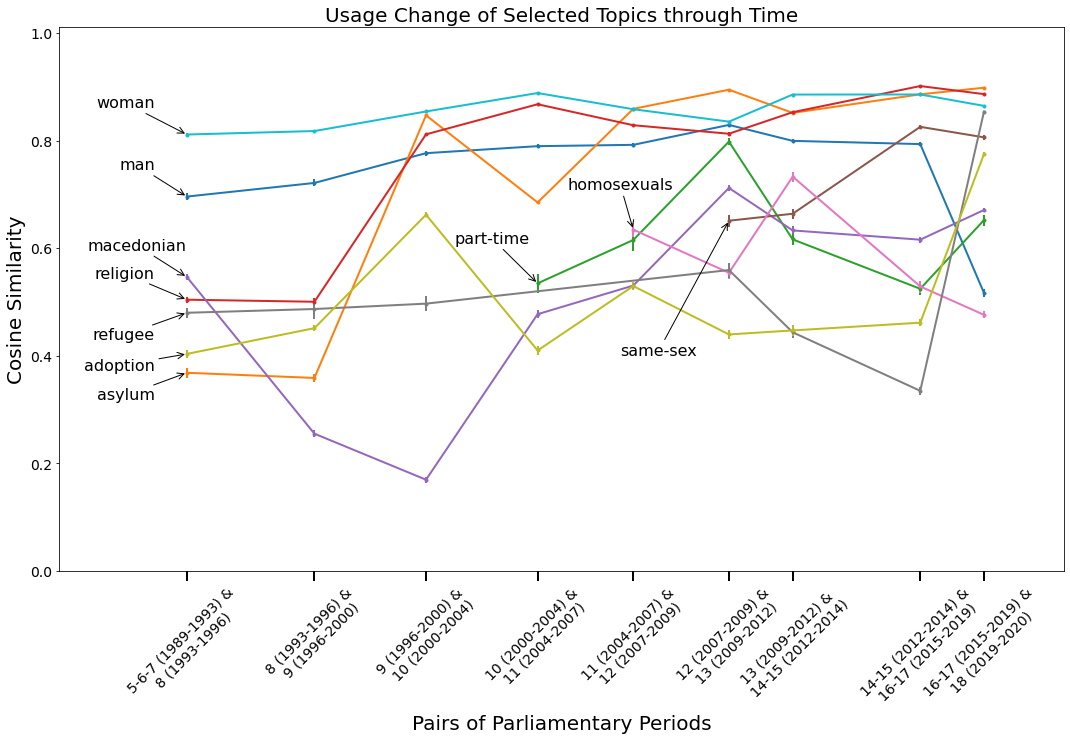

In [21]:
fig = plt.figure(figsize=(18, 10))


xytext_offsets = {
    'asylum': (-1, -0.05),
    'macedonian': (0, 0.05),
    'part-time': (-0.25, 0.075), 
    'woman': (-1, 0.05),
    'homosexuals': (1.25, 0.075),
    'refugee': (-1, -0.05),
    'religion': (-1, 0.04),
    'man': (-1, 0.05),
    'same-sex': (-1, -0.25),
    'adoption': (-1, -0.03)
}

for ti, topic in enumerate(topics_to_show):
    selected_topic_df = selected_topics_df[selected_topics_df['word'] == topic]
    #print(selected_topic_df)
    yerr = [
        selected_topic_df['yerr_low'],
        selected_topic_df['yerr_high']
    ]
    
    average_similarity = selected_topic_df[('semantic_similarity', 'mean')]
    x = selected_topic_df['period_middle'].iloc[0]
    y = average_similarity.iloc[0]
    plt.errorbar(x=selected_topic_df['period_middle'], 
                 y=average_similarity, 
                 yerr=yerr, 
                 label=topic, 
                 linewidth=2, markersize=3, fmt='-o')
    plt.annotate(topics[topic], 
                 xy=(x, y), 
                 xytext=(x+xytext_offsets[topics[topic]][0], y+xytext_offsets[topics[topic]][1]),
                 fontsize=16,
                 ha='right',
                 arrowprops=dict(arrowstyle='->'))

plt.xlim((1988.5, 2020))
plt.ylim((0.0, 1.01))

xticks = selected_topic_df['period_middle'].unique()
xtick_labels = [ period_ticklabel(x) for x in sorted(selected_topic_df['period_pair'].unique()) ]
plt.xticks(xticks, xtick_labels, rotation=45, fontsize=14)
plt.tick_params(axis='x', direction='out', which='major', length=10, width=2)
plt.yticks(fontsize=14)


plt.ylabel('Cosine Similarity', fontsize=20)
plt.xlabel('Pairs of Parliamentary Periods', fontsize=20)
_ = plt.title('Usage Change of Selected Topics through Time', fontsize=20)
plt.savefig('../out_files/usage_change_of_selected_topics_through_time_with_errorbars.png', dpi=300,  
            bbox_inches='tight')